# PANDAS SALES ANALYSIS

<h4> OBJECTIVE

Upon initial inspection of the data, we can start thinking of some questions about it that we would want to answer:

1. *What is the overall sales trend?* 
2. *What are the top 10 products by sales?*
3. *What are the most selling products?*
4. *Which is the most preferred ship Mode?*
5. *Which are the most profitable category and sub-category?*

<h4> IMPORTING REQUIRED LIBRARIES

In [158]:
df = pd.read_excel('superstore_sales.xlsx')

<h4> DATA AUDIT

In [143]:
# First five rows of the dataset
df.head()

,category,sub_category,profit
0,Furniture,Chairs,200
1,Furniture,Tables,300
2,Office Supplies,Paper,150
3,Office Supplies,Pens,100
4,Furniture,Chairs,400


In [144]:
# Last five rows of the dataset
df.tail()

,category,sub_category,profit
0,Furniture,Chairs,200
1,Furniture,Tables,300
2,Office Supplies,Paper,150
3,Office Supplies,Pens,100
4,Furniture,Chairs,400


In [145]:
# Shape of the dataset
df.shape

(5, 3)

In [146]:
# Columns persent in the dataset
df.columns

Index(['category', 'sub_category', 'profit'], dtype='object')

In [147]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      5 non-null      object
 1   sub_category  5 non-null      object
 2   profit        5 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


In [148]:
# Checking missing values
df.isnull().sum()

category        0
sub_category    0
profit          0
dtype: int64

In [149]:
# Getting descriptive statistics summary
df.describe()

,profit
count,5.000000
mean,230.000000
std,120.415946
min,100.000000
25%,150.000000
50%,200.000000
75%,300.000000
max,400.000000


# EXPLORATORY DATA ANALYSIS

- <H4> WHAT IS THE OVERALL SALES TREND?

In [160]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [161]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [162]:
# Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [163]:
# Grouping month year
df_trend = df.groupby('month_year', as_index=False)['sales'].sum()

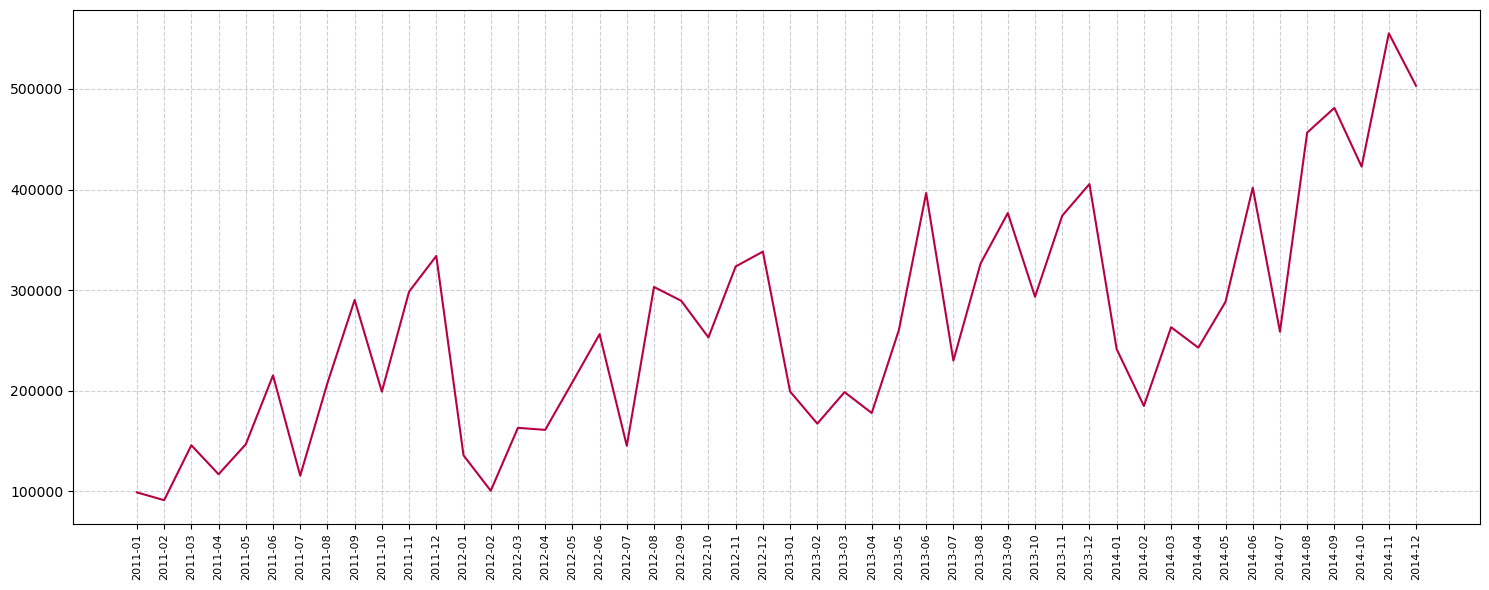

In [154]:
import matplotlib.pyplot as plt

# Setting the figure size
plt.figure(figsize=(15, 6))

# Plotting the sales data with a custom color
plt.plot(df_trend['month_year'], df_trend['sales'], color='#b80045')

# Rotating x-axis labels to be vertical and adjusting label size
plt.xticks(rotation=90, size=8)

# Adding gridlines for better visualization
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()  # Prevent clipping of labels
plt.show()


- <h4> WHICH ARE THE TOP 10 PRODUCTS BY SALES?

In [176]:
import pandas as pd

# Example DataFrame (replace this with your actual data)
data = {
    'product_name': ['Product A', 'Product B', 'Product C', 'Product D', 'Product A', 'Product C', 'Product E'],
    'sales': [500, 300, 700, 200, 400, 800, 150]
}

df = pd.DataFrame(data)

# Grouping products by sales
prod_sales = df.groupby('product_name').sum()['sales'].reset_index()

# Sorting the DataFrame in descending order of sales
prod_sales = prod_sales.sort_values(by='sales', ascending=False)

# Selecting the top 10 products by sales
top_10_prod_sales = prod_sales.head(10)

# Displaying the result
print("Top 10 Products by Sales:")
print(top_10_prod_sales)


Top 10 Products by Sales:
  product_name  sales
2    Product C   1500
0    Product A    900
1    Product B    300
3    Product D    200
4    Product E    150


In [175]:
# Sorting prod_sales column
prod_sales = prod_sales.sort_values('sales',ascending=False)

In [166]:
# Top 10 by products by sales
prod_sales[:10]

,sales
product_name,
B,500
A,250
C,250


- <h4> WHICH ARE THE MOST SELLING PRODUCTS

In [185]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'product_name': ['Product A', 'Product B', 'Product C', 'Product A', 'Product D', 'Product C', 'Product B'],
    'quantity': [50, 30, 20, 70, 10, 60, 40]
}

df = pd.DataFrame(data)

# Grouping by 'product_name' and summing the quantities sold
most_selling_products = df.groupby('product_name').sum()['quantity'].reset_index()

# Sorting the products by quantity in descending order
most_selling_products = most_selling_products.sort_values(by='quantity', ascending=False)

# Displaying the most selling products
print("Most Selling Products:")
print(most_selling_products)

# Optionally, display only the top 10 most selling products
top_10_most_selling = most_selling_products.head(10)
print("\nTop 10 Most Selling Products:")
print(top_10_most_selling)


Most Selling Products:
  product_name  quantity
0    Product A       120
2    Product C        80
1    Product B        70
3    Product D        10

Top 10 Most Selling Products:
  product_name  quantity
0    Product A       120
2    Product C        80
1    Product B        70
3    Product D        10


- <h4> WHAT IS THE MOST PREFERRED SHIP MODE?

C:\Users\smohh\AppData\Local\Temp\ipykernel_14324\2674722327.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ship_mode', data=df, palette='viridis')  # Change the palette for better visuals


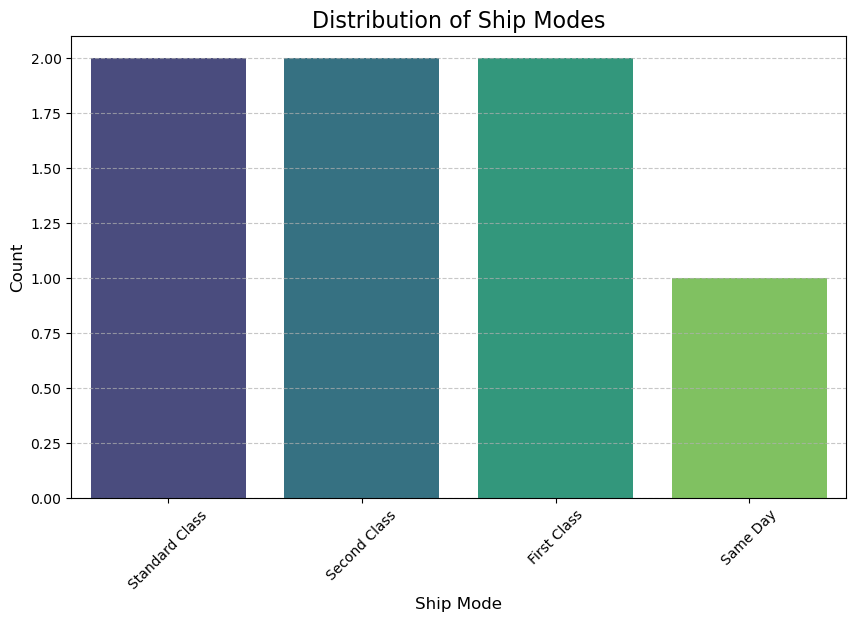

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the count of each category in 'ship_mode'
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(x='ship_mode', data=df, palette='viridis')  # Change the palette for better visuals
plt.title('Distribution of Ship Modes', fontsize=16)  # Add title with font size
plt.xlabel('Ship Mode', fontsize=12)  # Customize x-axis label
plt.ylabel('Count', fontsize=12)  # Customize y-axis label
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.show()



- <h4> WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?

In [183]:
import pandas as pd

# Example DataFrame (replace with your actual data)
data = {
    'category': ['Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Technology', 'Technology'],
    'sub_category': ['Chairs', 'Tables', 'Paper', 'Binders', 'Phones', 'Laptops'],
    'profit': [300, 150, 200, 400, 800, 1200]
}

df = pd.DataFrame(data)

# Grouping by 'category' and 'sub_category' and calculating the sum of profits
cat_subcat_profit = df.groupby(['category', 'sub_category']).sum()['profit'].reset_index()

# Sorting by profit in descending order
cat_subcat_profit = cat_subcat_profit.sort_values(by='profit', ascending=False)

# Display the most profitable category and sub-category
most_profitable = cat_subcat_profit.iloc[0]

print("Most Profitable Category and Sub-Category:")
print(most_profitable)

# Optionally, display the entire sorted DataFrame
print("\nAll Categories and Sub-Categories by Profit:")
print(cat_subcat_profit)



Most Profitable Category and Sub-Category:
category        Technology
sub_category       Laptops
profit                1200
Name: 4, dtype: object

All Categories and Sub-Categories by Profit:
          category sub_category  profit
4       Technology      Laptops    1200
5       Technology       Phones     800
2  Office Supplies      Binders     400
0        Furniture       Chairs     300
3  Office Supplies        Paper     200
1        Furniture       Tables     150
